### Months and Day of the week

In [1]:
import yfinance as yf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import calendar

In [2]:
# List of tickers
tickers = ["SPY", "QQQ", "DIA", # ETFs
          "AAPL", "MSFT", "AMZN", "GOOGL", # Stocks
          "GLD", "SLV", "PPLT", # Commodities
          "EURUSD=X", "JPY=X", "GBPUSD=X", "CNY=X"] # Currencies
        #   "BTC-USD"] # Crypto

# Retrieve the stock data
assets = yf.download(tickers, start="2010-01-01", end="2024-12-31")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  14 of 14 completed


In [3]:
assets = assets.ffill().dropna()

In [4]:
LogReturns = np.log(assets['Close']).diff()
LogReturns.columns = pd.MultiIndex.from_product([['LogReturns'],LogReturns.columns])
new_assets = pd.concat([assets, LogReturns], axis=1)
new_assets.columns.names = ["Features", "Tickers"]

In [5]:
new_assets['MonthName'] = assets.index.strftime('%B')
new_assets['MonthNum'] = assets.index.month
new_assets['DayofWeek'] = assets.index.dayofweek
new_assets['DayofYear'] = assets.index.dayofyear


## Day of the Week Effect

In [6]:
df_by_wday = new_assets.groupby('DayofWeek',observed=False)['LogReturns'].mean()*100 # .median()
df_by_wday.index = [calendar.day_name[i] for i in range(5)]
df_by_wday

Features  LogReturns                                                    \
Tickers         AAPL      AMZN     CNY=X       DIA  EURUSD=X  GBPUSD=X   
Monday      0.278432  0.020427 -0.046074  0.027694 -0.034021 -0.047112   
Tuesday     0.149289  0.166654  0.064151  0.057052  0.002890  0.008132   
Wednesday   0.138113  0.099715 -0.005278  0.047250 -0.009668 -0.009153   
Thursday   -0.049256  0.139971 -0.007663  0.039332  0.005250  0.022236   
Friday     -0.046245  0.021478  0.003641  0.048114 -0.005812 -0.005038   

Features                                                               \
Tickers         GLD     GOOGL     JPY=X      MSFT      PPLT       QQQ   
Monday    -0.010913  0.027731  0.013312  0.039573 -0.042560  0.072509   
Tuesday    0.035064  0.117461 -0.000578  0.068655  0.054081  0.119369   
Wednesday -0.021324  0.134553  0.026418  0.115319 -0.011207  0.084815   
Thursday   0.022386  0.037812  0.014773  0.070796 -0.056922  0.039875   
Friday     0.073444  0.008238  0.014286  0.078542 -0.027099  0.008578   

Features                       
Tickers         SLV       SPY  
Monday     0.014206  0.029523  
Tuesday    0.027297  0.078902  
Wednesday  0.003148  0.054569  
Thursday  -0.047516  0.039782  
Friday     0.050968  0.041945

Volume by weekday

In [7]:
volume_by_wday = new_assets.groupby('DayofWeek',observed=False)['Volume'].median()
volume_by_wday.index = [calendar.day_name[i] for i in range(5)]
volume_by_wday

Features        Volume                                                 \
Tickers           AAPL        AMZN CNY=X        DIA EURUSD=X GBPUSD=X   
Monday     137210600.0  67832000.0   0.0  3956200.0      0.0      0.0   
Tuesday    137564700.0  68548000.0   0.0  4354000.0      0.0      0.0   
Wednesday  136127200.0  66872000.0   0.0  4378700.0      0.0      0.0   
Thursday   134841600.0  69856000.0   0.0  4400700.0      0.0      0.0   
Friday     154519450.0  75011000.0   0.0  4456000.0      0.0      0.0   

Features                                                                 \
Tickers          GLD       GOOGL JPY=X        MSFT     PPLT         QQQ   
Monday     7333850.0  35639950.0   0.0  29301450.0  62750.0  34558550.0   
Tuesday    7803100.0  37518000.0   0.0  28950800.0  65600.0  36900300.0   
Wednesday  8424100.0  36376000.0   0.0  29749100.0  66400.0  39872400.0   
Thursday   8111400.0  37590700.0   0.0  30202100.0  67500.0  41799500.0   
Friday     8518250.0  40550000.0   0.0  32534650.0  62900.0  40155550.0   

Features                            
Tickers           SLV          SPY  
Monday     11086300.0   82473400.0  
Tuesday    11580400.0   88389300.0  
Wednesday  12932700.0   92473700.0  
Thursday   12846100.0   92968400.0  
Friday     12433150.0  103234950.0

## Day of the year

In [8]:
df_by_day = new_assets.groupby('DayofYear',observed=False)['LogReturns'].mean()*100 # .median()
df_by_day

Features  LogReturns                                                    \
Tickers         AAPL      AMZN     CNY=X       DIA  EURUSD=X  GBPUSD=X   
DayofYear                                                                
1           0.000000  0.000000 -0.134984  0.000000 -0.201670  0.302261   
2           0.124723  0.718557 -0.124708  0.323445 -0.028542  0.179468   
3          -1.191940  0.645817 -0.075188 -0.074259 -0.294095 -0.315862   
4          -0.107596 -0.694790  0.083387  0.316820 -0.173139 -0.131647   
5          -0.477275  0.055343 -0.110549 -0.224566 -0.081693 -0.028940   
...              ...       ...       ...       ...       ...       ...   
362        -0.480420  0.027571 -0.058442 -0.246872  0.285830  0.081796   
363         0.500110  0.620727 -0.031348  0.188938 -0.179663 -0.228440   
364        -0.526140 -0.476751 -0.025459 -0.296418  0.224545  0.064335   
365        -0.467191 -0.576599 -0.049032 -0.107394  0.289301  0.166806   
366         1.781220  0.705096 -0.099843  0.853718  0.105810  0.627221   

Features                                                               \
Tickers         GLD     GOOGL     JPY=X      MSFT      PPLT       QQQ   
DayofYear                                                               
1          0.000000  0.000000  0.004285  0.000000  0.000000  0.000000   
2          0.452076  0.518792 -0.161500  0.382914  0.604498  0.412836   
3          0.280845  0.543509 -0.142615 -0.288437  0.787095 -0.087980   
4          0.279424  0.001520  0.260691 -0.409314  0.085591  0.002262   
5          0.236929 -0.646866  0.249573 -0.541892  0.635639 -0.218063   
...             ...       ...       ...       ...       ...       ...   
362       -0.191519 -0.328091  0.051727 -0.336574 -0.350623 -0.377323   
363       -0.057948  0.392988  0.092459  0.246467  0.085856  0.279190   
364        0.274040 -0.425186 -0.150214 -0.463278  0.268948 -0.331571   
365        0.133105 -0.669067 -0.321218 -0.547434  0.577089 -0.396690   
366        0.644199  0.993449 -0.529086  0.467058  0.608204  1.170145   

Features                       
Tickers         SLV       SPY  
DayofYear                      
1          0.000000  0.000000  
2          0.674739  0.270091  
3          0.346335 -0.007295  
4         -0.008406  0.225696  
5          0.137971 -0.254798  
...             ...       ...  
362       -0.610403 -0.324485  
363        0.456050  0.225306  
364        0.244982 -0.322406  
365       -0.288012 -0.201556  
366        0.076615  1.096083  

[366 rows x 14 columns]

## Monthly Effect

In [9]:
df_by_month = new_assets.groupby('MonthName',observed=False)['LogReturns'].mean()*100 # .median()

# Reindex the DataFrame to put the months in order
month_order = [calendar.month_name[i] for i in range(1, 13)]
df_by_month = df_by_month.reindex(month_order)
df_by_month

Features  LogReturns                                                    \
Tickers         AAPL      AMZN     CNY=X       DIA  EURUSD=X  GBPUSD=X   
MonthName                                                                
January    -0.010448  0.174416 -0.033522  0.010269 -0.018669  0.023560   
February    0.125436 -0.037850  0.015299  0.047036 -0.022555 -0.029941   
March       0.140033  0.172086  0.007865  0.039132 -0.006920 -0.020874   
April       0.065707  0.181062  0.010646  0.059605  0.013632  0.040043   
May         0.113801  0.023714  0.018567 -0.024585 -0.065115 -0.055100   
June        0.048837  0.110046  0.022966  0.019095  0.010304 -0.025732   
July        0.307976  0.266565 -0.007688  0.118074  0.024567  0.037016   
August      0.176875  0.055288  0.013062 -0.021639  0.001898 -0.024772   
September  -0.072422  0.015369 -0.000374 -0.021394 -0.020275 -0.024432   
October     0.145855  0.019830 -0.001119  0.102654 -0.001630 -0.004000   
November    0.097439  0.180059 -0.011378  0.164472 -0.048858  0.008063   
December   -0.017635 -0.091270 -0.012656  0.035228  0.033126  0.001505   

Features                                                               \
Tickers         GLD     GOOGL     JPY=X      MSFT      PPLT       QQQ   
MonthName                                                               
January    0.094096  0.082233 -0.018144  0.071122  0.093072  0.067484   
February   0.017795  0.013646  0.031775  0.050538  0.027866  0.080337   
March      0.026906  0.041187  0.045272  0.098744 -0.099211  0.081334   
April      0.074425 -0.006577  0.017393  0.157146  0.088430  0.044827   
May       -0.040006  0.102018  0.015322  0.001903 -0.113522  0.048343   
June      -0.009889 -0.067371 -0.000084  0.058768 -0.142868  0.038984   
July       0.060178  0.343211 -0.051657  0.136489  0.067956  0.184860   
August     0.103879 -0.031763 -0.015063  0.054199  0.009137  0.022941   
September -0.102270 -0.017984  0.037452 -0.081124 -0.164251 -0.039391   
October    0.049859  0.188475  0.042718  0.182287  0.068861  0.098521   
November  -0.061750  0.042821  0.061762  0.137670 -0.099629  0.144117   
December   0.019301  0.079471 -0.000487  0.024142  0.062946  0.006921   

Features                       
Tickers         SLV       SPY  
MonthName                      
January    0.059436  0.030180  
February   0.017627  0.063432  
March      0.004588  0.058129  
April      0.080183  0.057909  
May       -0.081937  0.000405  
June      -0.067417  0.028070  
July       0.146991  0.132341  
August     0.093473 -0.015558  
September -0.214482 -0.042125  
October    0.111924  0.096297  
November  -0.059757  0.147485  
December   0.017618  0.031633

## Sell in May and go away

Wait until October to get back into the market.

In [10]:
bins = [0, 4, 10, 12]  # 1-4, 5-10, 11-12
labels = ['Nov_Apr', 'May_Oct', 'Nov_Apr']  # Note: both 1-4 and 11-12 map to 'Nov_Apr'
new_assets['MaySeasonality'] = pd.cut(new_assets['MonthNum'], bins=bins, labels=labels, ordered=False)
# new_assets['MaySeasonality'] = np.where(np.logical_and(new_assets['MonthNum'] >= 5, new_assets['MonthNum'] <= 10), 'May_Oct', 'Nov_Apr')

In [11]:
May_Seasonality = new_assets.groupby('MaySeasonality',observed=False)['LogReturns'].mean()*100
May_Seasonality

Features       LogReturns                                                    \
Tickers              AAPL      AMZN     CNY=X       DIA  EURUSD=X  GBPUSD=X   
MaySeasonality                                                                
May_Oct          0.121572  0.081896  0.007551  0.028873 -0.008451 -0.016132   
Nov_Apr          0.066144  0.097510 -0.004173  0.059175 -0.008103  0.003922   

Features                                                                    \
Tickers              GLD     GOOGL     JPY=X      MSFT      PPLT       QQQ   
MaySeasonality                                                               
May_Oct         0.011057  0.087241  0.004621  0.059399 -0.044673  0.059578   
Nov_Apr         0.028552  0.042646  0.022831  0.090019  0.011697  0.070585   

Features                            
Tickers              SLV       SPY  
MaySeasonality                      
May_Oct        -0.000433  0.033539  
Nov_Apr         0.019864  0.064626

## Yearly Returns

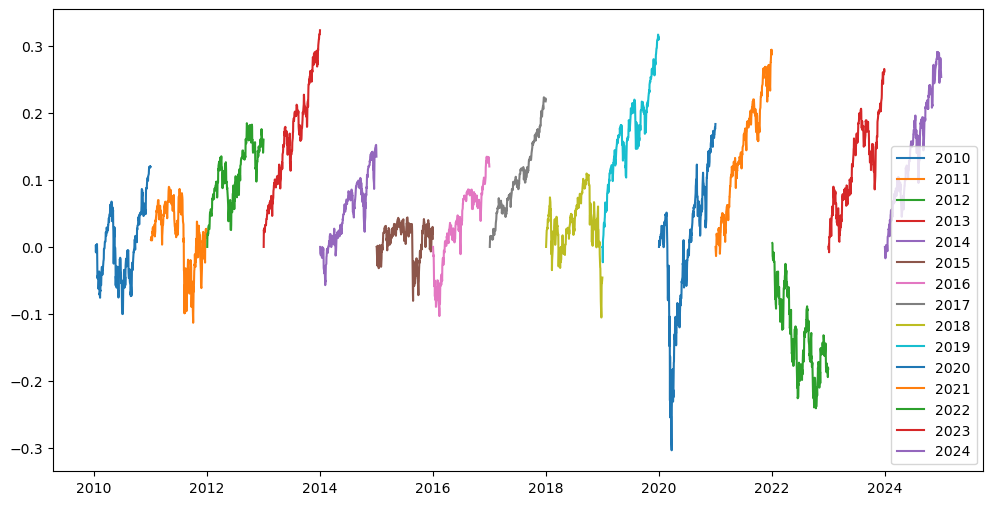

In [12]:
spy = new_assets.xs('SPY', level='Tickers',axis=1)
plt.figure(figsize=(12,6))
for year in spy.index.year.unique():
    sub = spy.loc[spy.index.year == year]
    plt.plot(sub.index, np.exp(sub['LogReturns'].cumsum())-1,label=year) # sub.index.dayofyear
plt.legend()

In [13]:
def min_return(returns):
    return returns.loc[returns.idxmin()], returns.idxmin()

for year in spy.index.year.unique():
    sub = spy.loc[spy.index.year == year]
    minimum, dt = min_return(np.exp(sub['LogReturns'].cumsum())-1)
    print(f"{year} {minimum * 100:6.2f}% on {dt:%Y-%m-%d}")

2010 -10.00% on 2010-07-02
2011 -11.31% on 2011-10-03
2012   0.00% on 2012-01-02
2013   0.00% on 2013-01-01
2014  -5.70% on 2014-02-03
2015  -8.04% on 2015-08-25
2016 -10.31% on 2016-02-11
2017   0.00% on 2017-01-02
2018 -10.52% on 2018-12-24
2019  -2.28% on 2019-01-03
2020 -30.32% on 2020-03-23
2021  -1.36% on 2021-01-04
2022 -24.06% on 2022-10-12
2023  -0.80% on 2023-01-05
2024  -1.69% on 2024-01-04


Remove the years with a huge drawdown

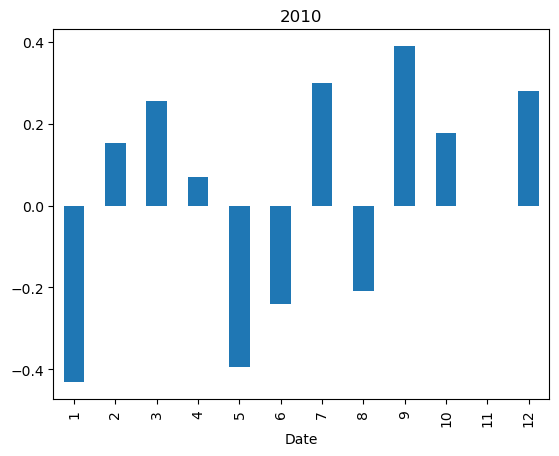

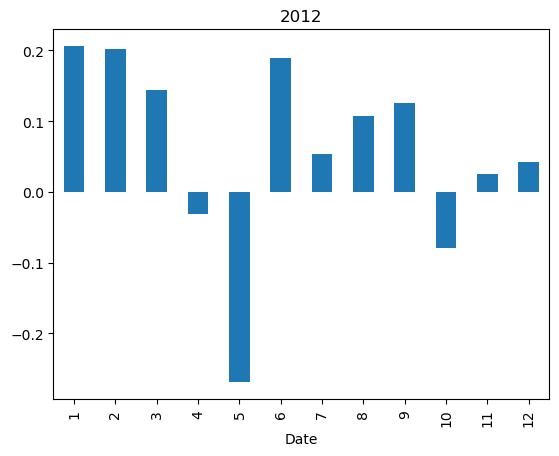

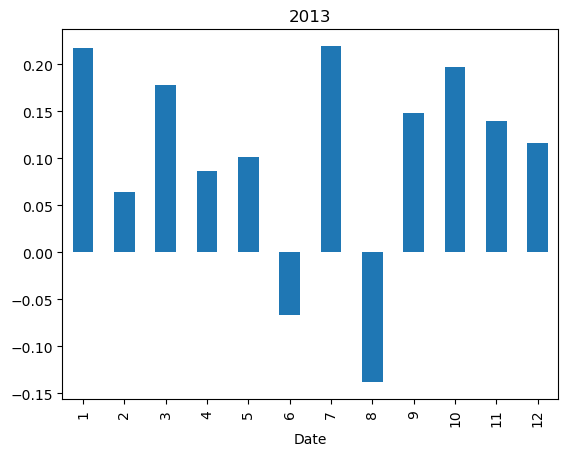

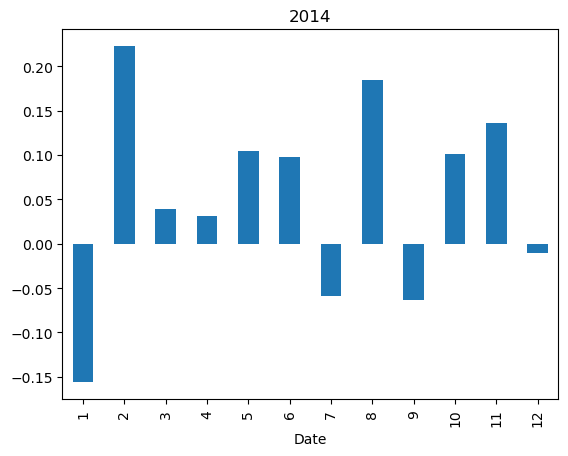

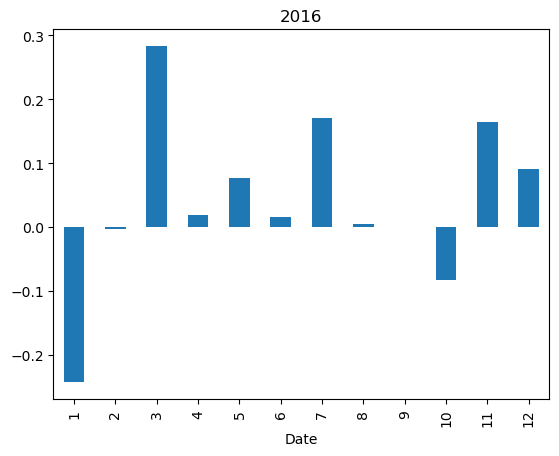

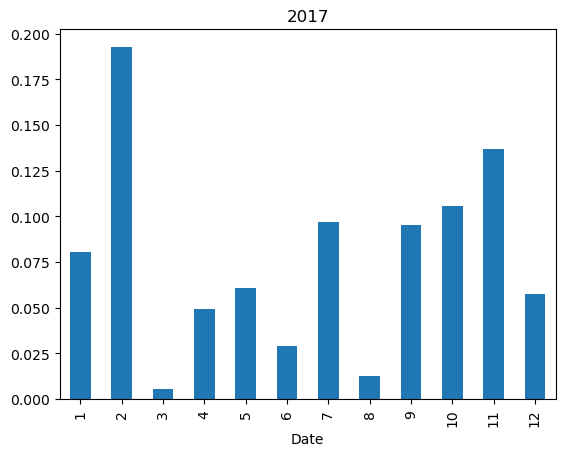

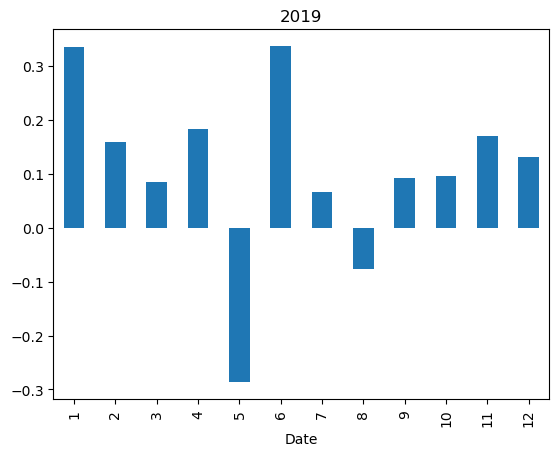

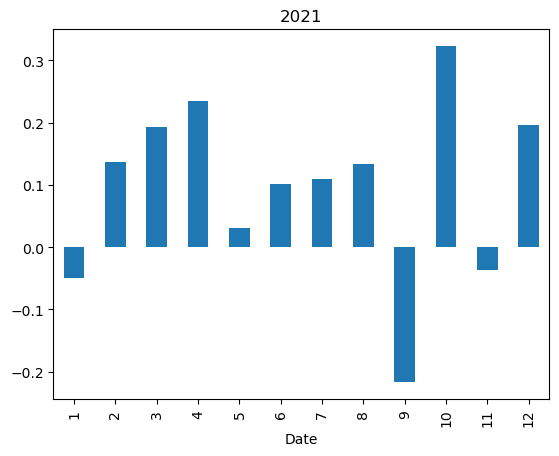

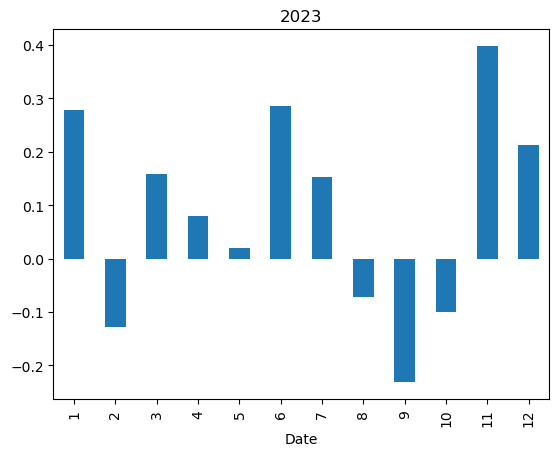

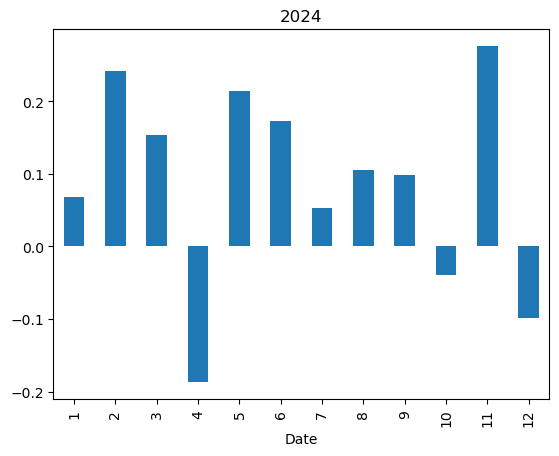

In [14]:
spy_drawdown = spy.loc[~spy.index.year.isin([2011,2015,2018,2020,2022])]
for year in spy_drawdown.index.year.unique():
    sub = spy_drawdown.loc[spy_drawdown.index.year == year]
    (sub.groupby(sub.index.month)['LogReturns'].mean()*100).plot.bar()
    plt.title(year)
    plt.show()
